# Question 1:
1 pt
Byte number 129 in a binary file contains letter D. What can we say about this file format?

    Definitely DICOM
    Definitely not DICOM
    Unknown (+)

# Question 2:
1 pt
What is the maximum number of grayscales a DICOM image can support?

    16
    256
    16*256
    256*256 (+)
    unlimited


# Question 3:
1 pts
Image acquisition timestamp in DICOM images makes the following imaging analysis possible:

    Temporal image analysis (+)
    Volume measurements
    Grayscale window selection
    Nrrd file conversion


# Question 4:
1 pts
Radiomics include:

    Size
    Texture
    Density
    All of the above (+???)


# Question 5:
1 pt
DICOM Conformance statement describes

    Hospital policies for DICOM data acquisition
    DICOM support on a particular device (+)
    Roadmap for clinical DICOM implementation
    Data elements in DICOM dictionary


# Question 6:
1 pt
3D data rendering in digital medicine has become possible because

    All medical data is acquired in 3D formats
    DICOM file contains multiple 3D slices
    3D information is stored in DICOM images (+)
    Advances in medical software


# Data prroblems

In [1]:
import pydicom

# Question 7:
3 pts
Using test_CT file provided, which of the following is true about the patient this image belongs to?

    Female, born in 1969
    Male, born in 1970 (+)
    Male, born in 1969
    Female, born in 1970


In [2]:
data = pydicom.dcmread('datasets/test_CT')

In [21]:
data.PatientSex, data.PatientBirthDate

('M', '19700101')

# Question 8:
4 pts

One of the advantages of DICOM files is that they can be calibrated to real physical scales. For instance, you can measure distances on DICOM images in millimeters, thus corresponding to the true, real sizes.
Open the test_CT file that I have provided; it is a 512x512 CT image.  What is the distance between pixels A=(151,30) and B=(200,300)?

    15 mm
    185 mm (+)
    285 mm
    385 mm
    485 mm

Hint: use PixelSpacing tag, which records the physical width and height of a single pixel in mm. And do not forget to find the length of hypotenuse … 


In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
l = data.PixelSpacing[0]
l

'0.675781'

In [20]:
A = np.array([151,30])
B = np.array([200,300])
np.linalg.norm((B - A) * l)

185.44125124961616

# Question 9:

6 pts

The idea of calibration can be extended to the image pixels as well. Pixel intensities in most image formats are unitless – that is, they are not usually mapped into any physical scale. However, in medical CT imaging pixel values can be converted to the universal Hounsfield units (HU), directly corresponding to various tissue densities found in human body (soft tissues, bones, lungs, brain, etc; see https://en.wikipedia.org/wiki/Hounsfield_scale) 

Pixel intensities are converted into HUs using the following simple formula

HU = (Pixel Intensity Value) × RescaleSlope + RescaleIntercept

Using test_CT image provided with this homework, do the following:
Read the image with pydicom
Extract pixel values as pixel_array (2D list)
Find RescaleIntercept and RescaleSlope values in its DICOM tags
Using the formula above, convert all image intensities into HU units

Now, assuming that bone HU range corresponds to HU>=300, how many bone pixels we have in this image?
(as always, pick the answer closest to yours)

    1700
    2700
    3700
    4700 (+)
    5700


In [25]:
rs, ri = data.RescaleSlope, data.RescaleIntercept
rs,ri

('1.0', '-3024.0')

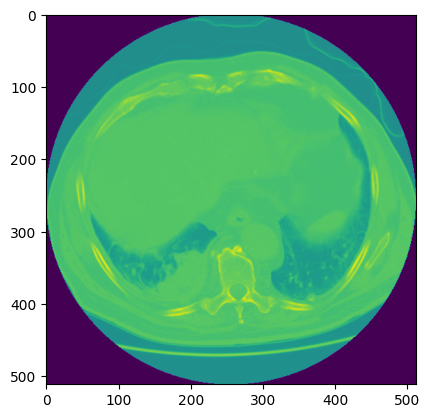

In [27]:
res = data.pixel_array * rs + ri
plt.imshow(res)

In [30]:
ans = (res >= 300).sum()
ans

4708